# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Top 3 Metaverse Tokens Below $150M to Watch in November 2022.  The metaverse is just a fictional version of the Internet that resembles the real world and uses technology like artificial intelligence, augmented reality, non-fungible tokens, and digital currencies. The General Metaverse tokens market capitalization is sitting at $12,912,338,609, and the current total trading volume is at $3,177,756,823. Note: This List is sorted by their market [&#8230;]The post Top 3 Metaverse Tokens Below $150M to Watch in November 2022 appeared first on NullTX. ... [| Skaityti daugiau](https://nulltx.com/top-3-metaverse-tokens-below-150m-to-watch-in-november-2022/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Police lawyer accuses convoy organizer Tamara Lich of having a 'selective' memory | CBC News.  A lawyer for the Ottawa Police Service accused Tamara Lich, one of the most recognizable faces of the anti COVID-19 restriction convoy protest, of having a selective memory of how events unfolded last winter, during a tense moment of cross-examination Friday … ... [| Skaityti daugiau](http://www.cbc.ca/news/politics/tamara-lich-mackenzie-bulford-1.6640630) 

### Kainų kaita pandemijos metu

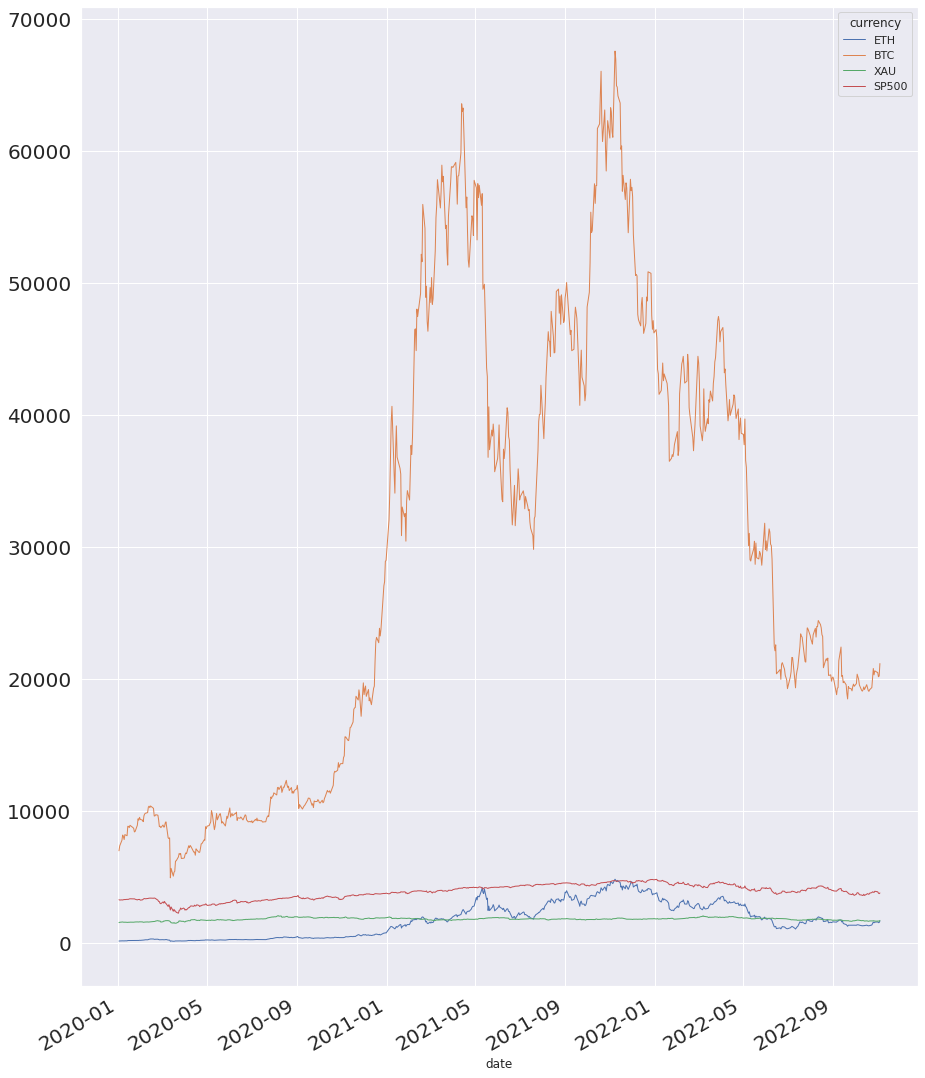

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.897098,0.254248,0.914341
BTC,0.897098,1.000000,0.238660,0.842760
XAU,0.254248,0.238660,1.000000,0.356941
SP500,0.914341,0.842760,0.356941,1.000000


In [8]:
#hide ### Koreliacijos matrica.

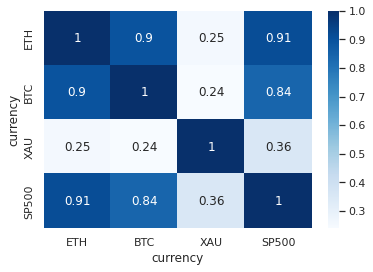

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')